# 1. Load dataloaders

In [1]:
from data.dataloaders import create_dataloaders

train_dataloader, val_dataloader = create_dataloaders(
    imgs_dir= "../BT_dataset/images",
    masks_dir= "../BT_dataset/masks",
    batch_size=2,
)

Train dataset size: 5451
Validation dataset size: 1363
-----------------------------------
Train dataloader size: 2725
Validation dataloader size: 682


# 2. Load model

In [1]:
from model import TumorSegmentaionModel

model = TumorSegmentaionModel()

# 3. Train model

In [4]:
from training.trainer import train

train(
    model,
    train_dataloader,
    val_dataloader,
    load_pretrained="checkpoints/brain_model.pth",
    epochs= 7)

Loaded pretrained model:
- val_loss=0.3030
- dice_loss=0.6905
- hausdorff_dist=35.2032
Training epoch no.1 / 7
-----------------------------------


Testing...: 100%|██████████| 682/682 [01:31<00:00,  7.43it/s, Loss=0.4549]


Model saved.
Epoch no.1 / 7 summary
-----------------------------------
Average train losses = 0.550
Average validation losses = 0.386
Dice Score: 0.3891
Hausdorff Distance: 124.5822

Training epoch no.2 / 7
-----------------------------------


Testing...: 100%|██████████| 682/682 [01:15<00:00,  9.05it/s, Loss=0.3675]


Model saved.
Epoch no.2 / 7 summary
-----------------------------------
Average train losses = 0.599
Average validation losses = 0.372
Dice Score: 0.6130
Hausdorff Distance: 40.8033

Training epoch no.3 / 7
-----------------------------------


Testing...: 100%|██████████| 682/682 [01:06<00:00, 10.24it/s, Loss=0.2454]


Model saved.
Epoch no.3 / 7 summary
-----------------------------------
Average train losses = 0.567
Average validation losses = 0.318
Dice Score: 0.6707
Hausdorff Distance: 46.5520

Training epoch no.4 / 7
-----------------------------------


Testing...: 100%|██████████| 682/682 [01:07<00:00, 10.11it/s, Loss=0.2259]


Model saved.
Epoch no.4 / 7 summary
-----------------------------------
Average train losses = 0.511
Average validation losses = 0.287
Dice Score: 0.7582
Hausdorff Distance: 39.5141

Training epoch no.5 / 7
-----------------------------------


Testing...: 100%|██████████| 682/682 [01:11<00:00,  9.52it/s, Loss=0.4443]


Model saved.
Epoch no.5 / 7 summary
-----------------------------------
Average train losses = 0.649
Average validation losses = 0.453
Dice Score: 0.3696
Hausdorff Distance: 149.9206

Training epoch no.6 / 7
-----------------------------------


Training...:  12%|█▏        | 325/2725 [01:56<14:17,  2.80it/s, Loss=0.7901, LR=0.000096]


KeyboardInterrupt: 

# 4. Plot example output

In [1]:
from model import TumorSegmentaionModel

model = TumorSegmentaionModel()

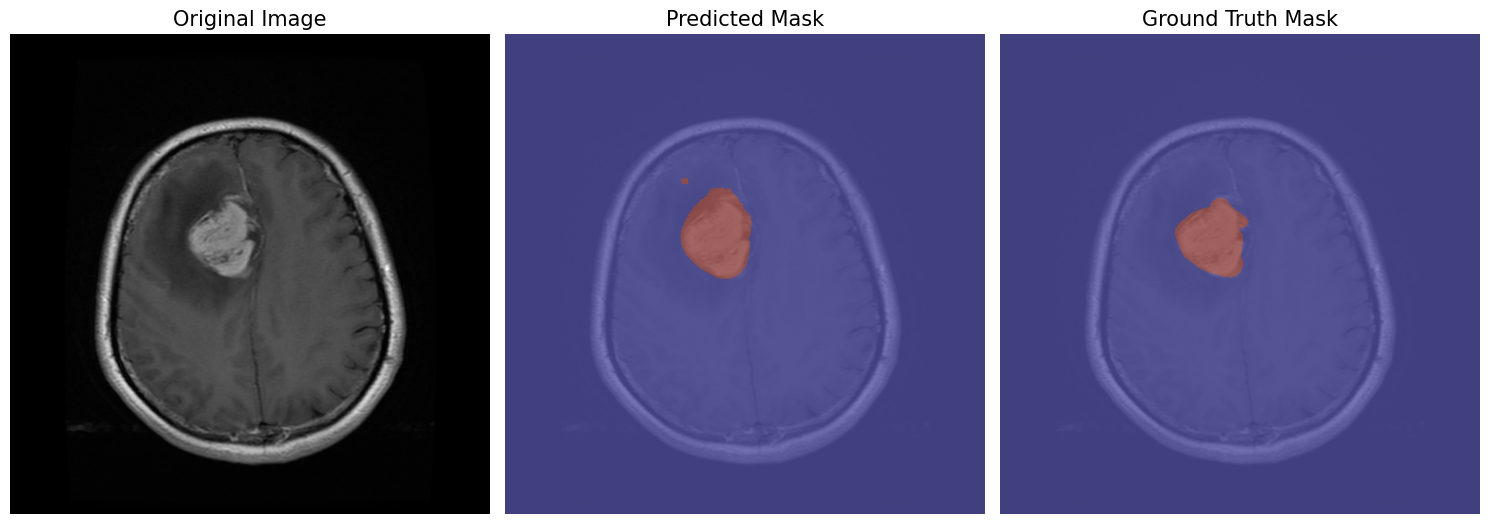

Predicted image: 116.png


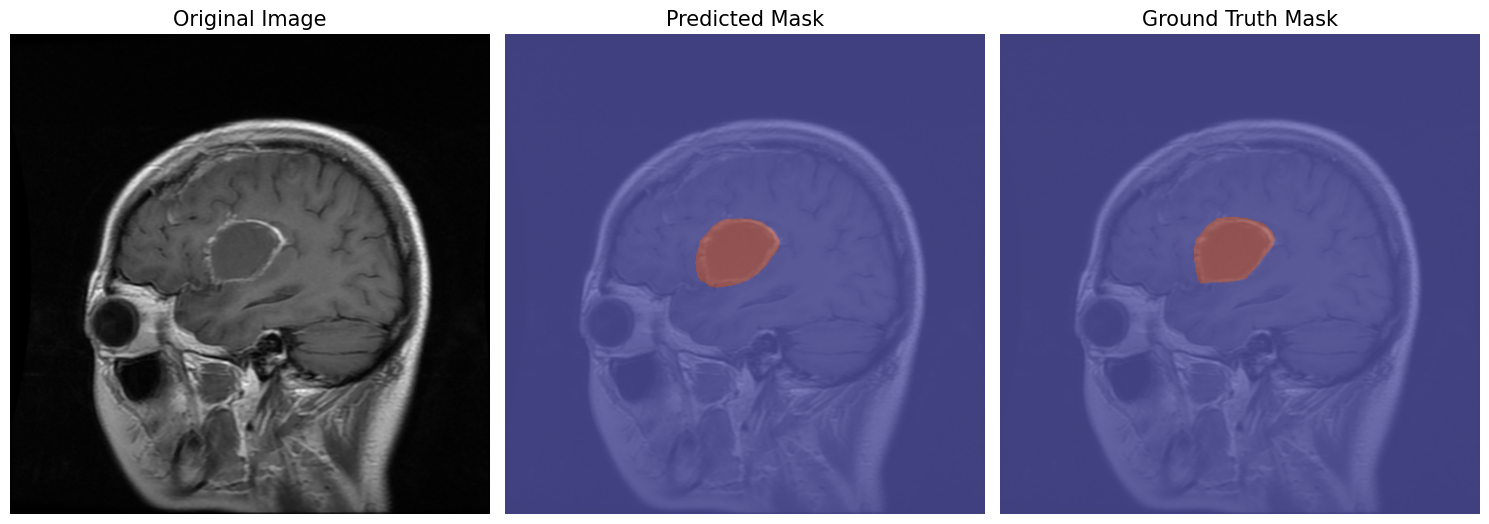

Predicted image: 889.png


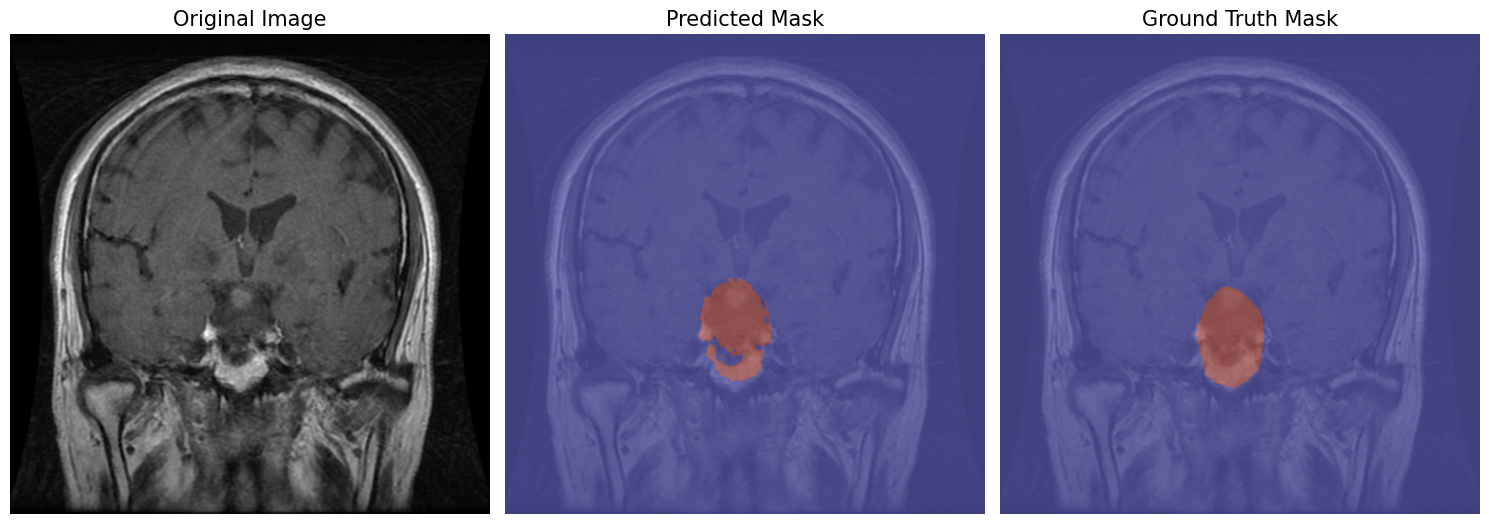

Predicted image: 1615.png


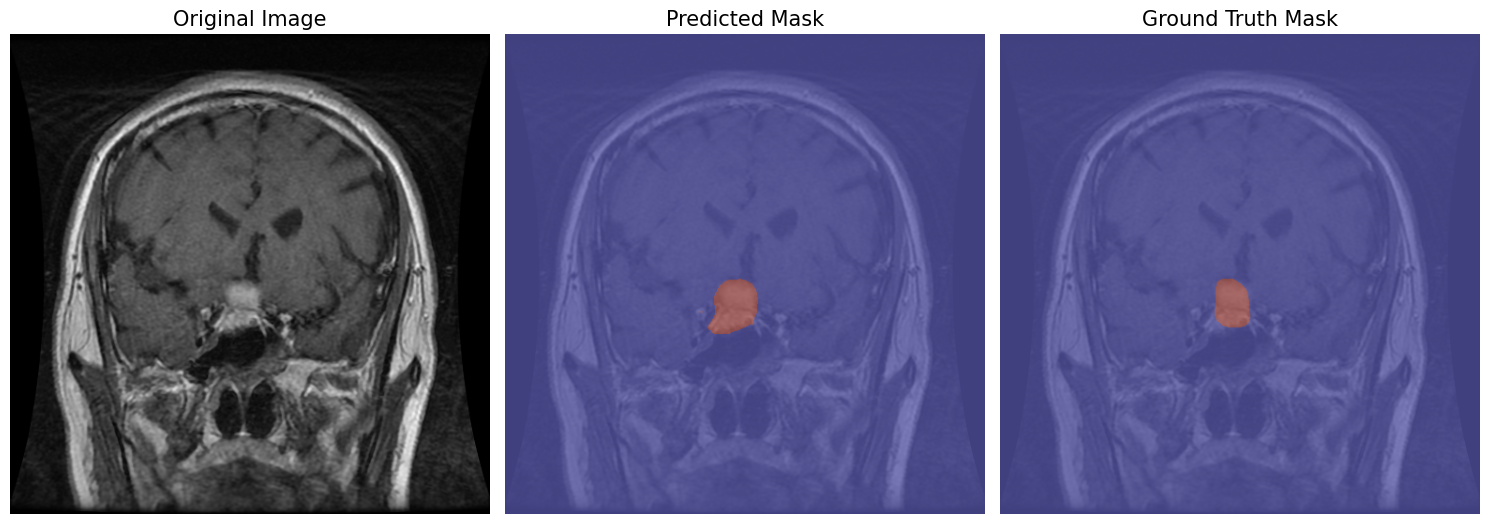

Predicted image: 1609.png


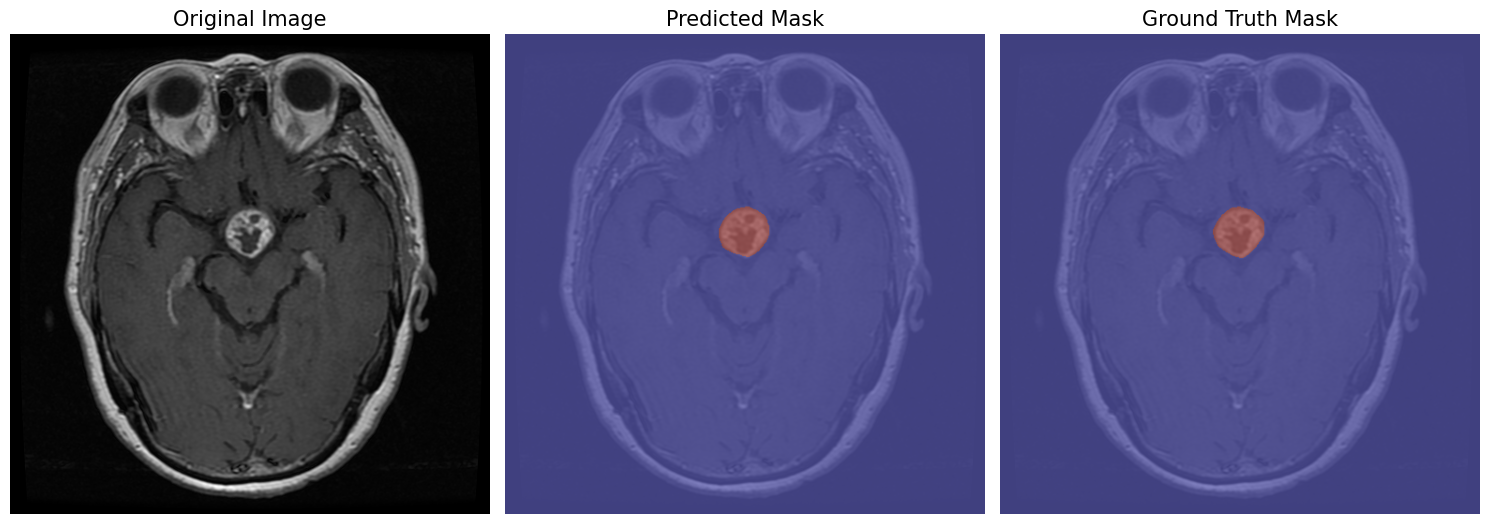

Predicted image: 1336.png


In [12]:
from model_outputs.visualize_output import visualize_random_prediction
import torch

checkpoint = torch.load("checkpoints/brain_model.pth", map_location="cuda")
model.load_state_dict(checkpoint['model_state_dict'])

for i in range (5):
    pred_mask = visualize_random_prediction(
        model, 
        images_dir= "../BT_dataset/images/",
        masks_dir= "../BT_dataset/masks/",
    )